<a href="https://colab.research.google.com/github/MuhamadAldo2107/Porto/blob/main/Colab_Muhamad_Aldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A) DATA SET AND BUSINESS UNDERSTANDING ( Milestone 1 )

**RevoBank** is a European bank that provides credit cards to its customers. One of RevoBank’s partners is RevoShop. They aims to increase the usage of RevoBank credit cards by partnering with RevoShop.
Our objective is to analyze data in order to understand of the spending patterns among RevoShop customer who are RevoBank credit card users.  And also seeking to find ways to reduce the cost of the promotion.


####**User Dataset (spreadsheet):**
* https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view?usp=sharing


####**Data Dictionary:**
* https://docs.google.com/spreadsheets/d/1-rHnt65_3MSINBv14I1TwSaRV9xGwDY11HNkaiFOdgo/edit?usp=sharing

## IMPORTING LIBRARY AND DATASET

In [ ]:
import gdown
import shutil
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
url = "https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view?usp=sharing"
output = "revobank.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe
To: /content/revobank.csv
100%|██████████| 16.5M/16.5M [00:00<00:00, 56.7MB/s]


'revobank.csv'

In [ ]:
df1 = pd.read_csv('/content/revobank.csv')
df1.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,...,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,...,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,...,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,...,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,...,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21


## Make copy data for cleaning

In [ ]:
df_clean = df1.copy()

#B) Data Cleaning

In [ ]:
# Change header column to lower alphabet so easier to proses

df_clean.rename(columns=lambda x: x.lower(), inplace=True)
df_clean.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,cust_value_group,mapp_active_group,homeowner_status,home_value,proxy_income,pct_income_retirement,mob,flag_female,promo_channel,birth_date
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,...,A,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,...,A,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,...,A,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,...,A,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,...,A,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21


## Checking Missing Value

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_id             112634 non-null  int64  
 1   mcc                    112634 non-null  object 
 2   merchant_name          112634 non-null  object 
 3   avg_txn_amt_l6m        112634 non-null  float64
 4   avg_txn_amt_ltm        112634 non-null  float64
 5   avg_promo_txn_amt_l6m  112634 non-null  float64
 6   avg_promo_txn_amt_ltm  112634 non-null  float64
 7   txn_cnt_l6m            112634 non-null  float64
 8   txn_cnt_ltm            112634 non-null  float64
 9   promo_txn_cnt_l6m      112634 non-null  float64
 10  promo_txn_cnt_ltm      112634 non-null  float64
 11  last_txn_day           112634 non-null  float64
 12  cnt_promo_l6m          112634 non-null  float64
 13  cnt_promo_l12m         112634 non-null  float64
 14  cust_value_group       112634 non-nu

### Insight

No missing value. But, in avg_promo_txn_amt_l6m "-1" = null. so we need to find and clean it.

In [ ]:
cek_avg =  df_clean['avg_promo_txn_amt_l6m'].value_counts()

print(cek_avg.to_markdown())

|        |   avg_promo_txn_amt_l6m |
|-------:|------------------------:|
|  100   |                   17677 |
|   50   |                    6476 |
|  150   |                    5958 |
|  120   |                    4103 |
|  200   |                    4047 |
|  110   |                    3928 |
|   -1   |                    3516 |
|  250   |                    2874 |
|   90   |                    2342 |
|   70   |                    2185 |
|  130   |                    2014 |
|   80   |                    1931 |
|   60   |                    1927 |
|  140   |                    1799 |
|  125   |                    1667 |
|   75   |                    1606 |
|  160   |                    1472 |
|  170   |                    1006 |
|  105   |                     998 |
|  106.7 |                     969 |
|  115   |                     905 |
|   95   |                     904 |
|  116.7 |                     884 |
|   55   |                     871 |
|   85   |                     847 |
|

In [ ]:
avg_count = (df_clean['avg_promo_txn_amt_l6m'] == -1).sum()

print(avg_count)

3516


## Dropping missing values

In [ ]:
df_clean = df_clean[df_clean['avg_promo_txn_amt_l6m'] != -1]

In [ ]:
avg_count = (df_clean['avg_promo_txn_amt_l6m'] == -1).sum()

print(avg_count)

0


## Show Count Values

In [ ]:
for col in df_clean.columns:
  print(col)
  print(df_clean[col].value_counts())
  print('\n')

account_id
100348692    2
100916285    2
100515122    2
100537136    2
100912879    2
            ..
100357142    1
100357127    1
100357125    1
100357121    1
101059869    1
Name: account_id, Length: 108925, dtype: int64


mcc
5262-MARKETPLACES         109117
5311-DEPARTMENT STORES         1
Name: mcc, dtype: int64


merchant_name
REVOSHOP           88319
REVOSH MKTPLC      19339
TOKTOKLIVE          1459
EL CORTE INGLES        1
Name: merchant_name, dtype: int64


avg_txn_amt_l6m
100.00    11491
150.00     3926
50.00      3757
110.00     3306
120.00     2767
          ...  
208.80        1
302.50        1
490.00        1
26.30         1
397.50        1
Name: avg_txn_amt_l6m, Length: 1028, dtype: int64


avg_txn_amt_ltm
100.00    812
50.00     692
80.00     621
90.00     615
70.00     551
         ... 
26.00       1
197.40      1
26.70       1
21.20       1
30.20       1
Name: avg_txn_amt_ltm, Length: 2264, dtype: int64


avg_promo_txn_amt_l6m
100.00    17677
50.00      6476
150.00   

### Removing Irrelevant Merchant Names

In [ ]:
df_clean = df_clean[df_clean['merchant_name'].isin(['REVOSHOP', 'REVOSH MKTPLC'])]

In [ ]:
print(df_clean['merchant_name'].value_counts())

REVOSHOP         88319
REVOSH MKTPLC    19339
Name: merchant_name, dtype: int64


Checking Info

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_id             107658 non-null  int64  
 1   mcc                    107658 non-null  object 
 2   merchant_name          107658 non-null  object 
 3   avg_txn_amt_l6m        107658 non-null  float64
 4   avg_txn_amt_ltm        107658 non-null  float64
 5   avg_promo_txn_amt_l6m  107658 non-null  float64
 6   avg_promo_txn_amt_ltm  107658 non-null  float64
 7   txn_cnt_l6m            107658 non-null  float64
 8   txn_cnt_ltm            107658 non-null  float64
 9   promo_txn_cnt_l6m      107658 non-null  float64
 10  promo_txn_cnt_ltm      107658 non-null  float64
 11  last_txn_day           107658 non-null  float64
 12  cnt_promo_l6m          107658 non-null  float64
 13  cnt_promo_l12m         107658 non-null  float64
 14  cust_value_group       107658 non-nu

## Checking Duplicated

In [ ]:
df_clean[df_clean.duplicated()]

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,cust_value_group,mapp_active_group,homeowner_status,home_value,proxy_income,pct_income_retirement,mob,flag_female,promo_channel,birth_date


## Check Typos

In [ ]:
for column in df_clean.select_dtypes(include=[object]):
    print("Column: ", column)
    print(df_clean[column].unique())
    print("\n")

Column:  mcc
['5262-MARKETPLACES']


Column:  merchant_name
['REVOSH MKTPLC' 'REVOSHOP']


Column:  cust_value_group
['A' 'B' 'C' 'D' 'E']


Column:  mapp_active_group
['X' 'Y' 'Z']


Column:  birth_date
['1975-12-17' '1991-12-27' '1970-03-22' ... '1995-11-12' '1961-11-21'
 '1996-10-13']




## Change data type birth_date into date time

In [ ]:
df_clean['birth_date'] = pd.to_datetime(df_clean['birth_date'], format = '%Y-%m-%d')

In [ ]:
# Make sure data type has change
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

## Create promo-sensitive customer column

In [ ]:
df_clean['Promo_Sensitive_Customer'] = (df_clean['avg_promo_txn_amt_ltm'] * df_clean['promo_txn_cnt_ltm'] / (df_clean['avg_txn_amt_ltm'] * df_clean['txn_cnt_ltm'])).apply(lambda x: 'Promo-sensitive' if x > 0.5 else 'Not-sensitive')

In [ ]:
df_clean.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,mapp_active_group,homeowner_status,home_value,proxy_income,pct_income_retirement,mob,flag_female,promo_channel,birth_date,Promo_Sensitive_Customer
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,...,X,0.00,90587.00,59785.00,32.00,123.00,1.00,0.00,1975-12-17,Not-sensitive
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,...,X,0.00,65814.00,32597.00,34.00,109.00,1.00,0.00,1991-12-27,Promo-sensitive
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,...,X,0.00,42583.00,0.00,1.00,89.00,0.00,0.00,1970-03-22,Not-sensitive
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,...,X,0.00,61176.00,0.00,0.00,86.00,1.00,1.00,1983-11-26,Promo-sensitive
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,...,X,0.00,44525.00,42253.00,22.00,124.00,1.00,0.00,1989-10-21,Promo-sensitive


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   account_id                107658 non-null  int64         
 1   mcc                       107658 non-null  object        
 2   merchant_name             107658 non-null  object        
 3   avg_txn_amt_l6m           107658 non-null  float64       
 4   avg_txn_amt_ltm           107658 non-null  float64       
 5   avg_promo_txn_amt_l6m     107658 non-null  float64       
 6   avg_promo_txn_amt_ltm     107658 non-null  float64       
 7   txn_cnt_l6m               107658 non-null  float64       
 8   txn_cnt_ltm               107658 non-null  float64       
 9   promo_txn_cnt_l6m         107658 non-null  float64       
 10  promo_txn_cnt_ltm         107658 non-null  float64       
 11  last_txn_day              107658 non-null  float64       
 12  cn

## Changing 0 menjadi NaN on Proxy_income

In [ ]:
# Mengganti 0 menjadi NaN
df_clean['proxy_income'].replace({0: np.nan}, inplace=True)

#C) EDA

## Creating copy for EDA

In [ ]:
df_eda = df_clean.copy()

### How many RevoShop customers do we have in the data?

#### Number of customers

In [ ]:
customer_count = df_eda['account_id'].count()
print("Total Customers : ", customer_count)

Total Customers :  107658


#### Customes Age / Age Distributions

In [ ]:
current_date = datetime(2023, 1, 31)
df_eda['customer_age'] = round((datetime(year=2023, month=7, day=20) - df_eda['birth_date']) / np.timedelta64(1, 'Y'))

bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '41-50', '>50']

df_eda['age_group'] = pd.cut(df_eda['customer_age'], bins=bins, labels=labels, include_lowest=True)

print(df_eda['age_group'].value_counts(normalize=True).sort_index())

<30     0.03
30-40   0.45
41-50   0.48
>50     0.05
Name: age_group, dtype: float64


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

desc_eda = df_eda['customer_age'].describe()
desc_eda

count   107658.00
mean        40.97
std          5.66
min         18.00
25%         37.00
50%         41.00
75%         45.00
max         66.00
Name: customer_age, dtype: float64

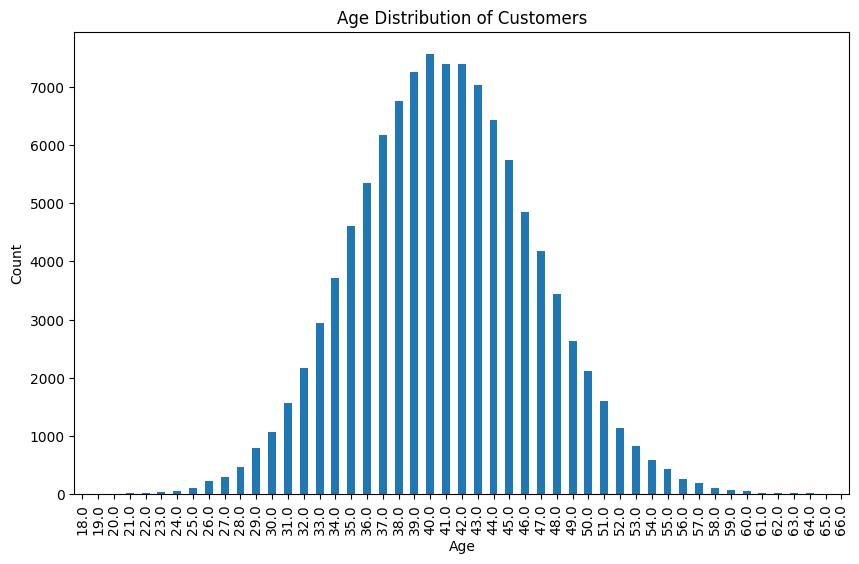

In [ ]:
plt.figure(figsize=(10,6))
df_eda['customer_age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

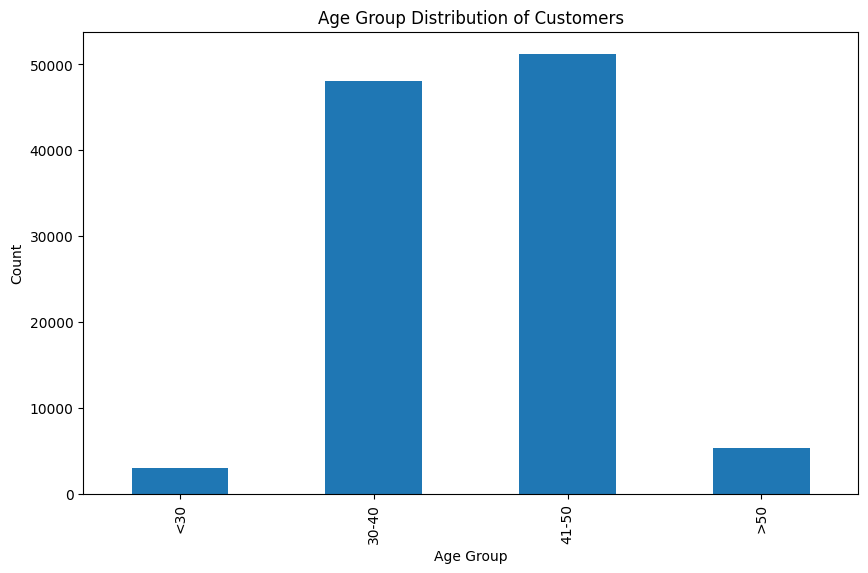

In [ ]:
plt.figure(figsize=(10,6))
df_eda['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Group Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### Gender Description / Gender Distribution

In [ ]:
df_eda['gender_describe'] = df_eda['flag_female']
df_eda['gender_describe'].replace({0: 'Male', 1: 'Female'}, inplace=True)
df_eda['gender_describe'].value_counts()

Female    63035
Male      44623
Name: gender_describe, dtype: int64

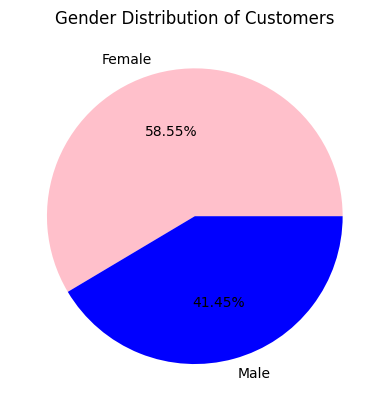

In [ ]:
gender_describe = df_eda['flag_female'].value_counts()

gender_describe.plot(kind='pie', autopct='%1.2f%%', labels=['Female', 'Male'], colors=['pink', 'blue'])

plt.title('Gender Distribution of Customers')
plt.ylabel('')

plt.show()

#### Customers MOB / MOB Distributions

In [ ]:
df_eda['month_account_created'] = df_eda['mob'].apply(lambda x: (datetime(2023, 1, 31) - DateOffset(months=x)).to_period('M'))
df_eda['creation_year'] = df_eda['month_account_created'].dt.year

print(df_eda['creation_year'].value_counts())

2012    37165
2015    14329
2013    13466
2016    13071
2014    12395
2017     8715
2018     4847
2019     2893
2011      243
2020      195
2010       98
2009       80
2008       49
2007       31
1999       15
2005       14
2006       14
2004       13
2003        9
1998        6
2021        5
2002        3
1975        2
Name: creation_year, dtype: int64


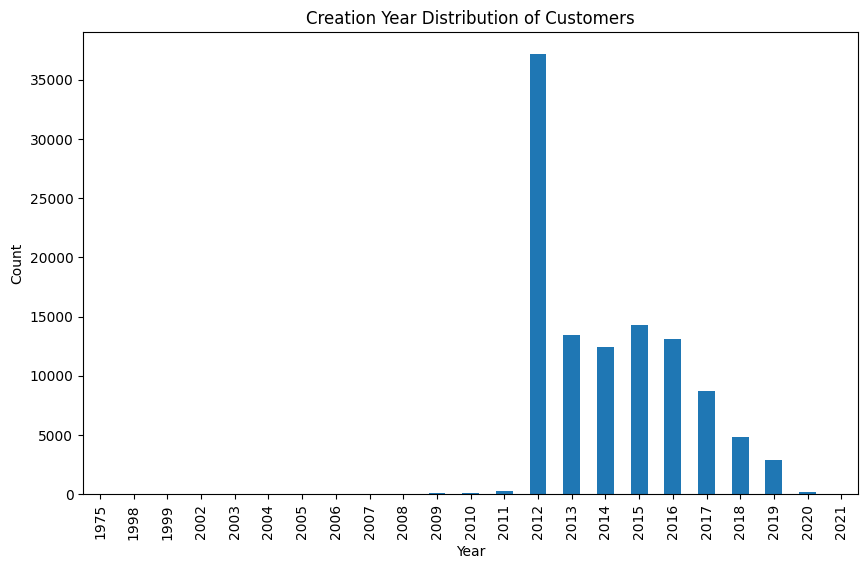

In [ ]:
plt.figure(figsize=(10,6))
df_eda['creation_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Creation Year Distribution of Customers')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

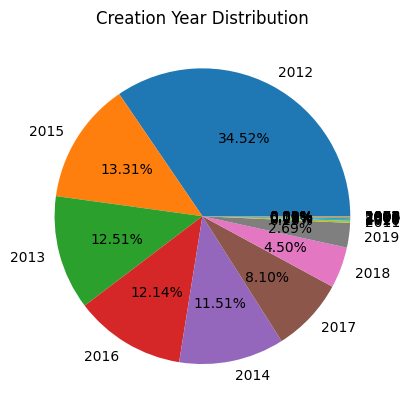

In [ ]:
gender_describe = df_eda['creation_year'].value_counts()

gender_describe.plot(kind='pie', autopct='%1.2f%%')

plt.title('Creation Year Distribution')
plt.ylabel('')

plt.show()

#### Income Distribution

In [ ]:
df_eda['proxy_income'].describe()

count    81399.00
mean     50398.22
std      16433.20
min       2496.00
25%      39466.00
50%      46692.00
75%      57950.50
max     200003.00
Name: proxy_income, dtype: float64

In [ ]:
bins = [2000, 50000, 100000, 150000, float('inf') ]
labels = ['2000 - 50000', '50001 - 100000', '100001 - 150000', '>150001']

df_eda['proxy_income_groups'] = pd.cut(df_eda['proxy_income'], bins=bins, labels=labels)

print(df_eda['proxy_income_groups'])

0         50001 - 100000
1           2000 - 50000
2                    NaN
3                    NaN
4           2000 - 50000
               ...      
112628               NaN
112629      2000 - 50000
112630               NaN
112631      2000 - 50000
112632               NaN
Name: proxy_income_groups, Length: 107658, dtype: category
Categories (4, object): ['2000 - 50000' < '50001 - 100000' < '100001 - 150000' < '>150001']


Find percentage group

In [ ]:
percentage = df_eda['proxy_income_groups'].value_counts(normalize=True).sort_index()
print(percentage*100)

2000 - 50000      58.72
50001 - 100000    39.81
100001 - 150000    1.34
>150001            0.13
Name: proxy_income_groups, dtype: float64


#### Past 6 Months Sales Analysis

In [ ]:
total = (df_eda['avg_txn_amt_l6m'] * df_clean['txn_cnt_l6m']).sum()

print(f'Total: €{total:,.2f}')

Total: €56,639,218.90


In [ ]:
total_promo = (df_eda['avg_promo_txn_amt_l6m'] * df_eda['promo_txn_cnt_l6m']).sum()

print(f'Total promo: €{total_promo:,.2f}')

Total promo: €35,208,915.90


In [ ]:
percentage = (((df_eda['avg_promo_txn_amt_l6m'] * df_eda['promo_txn_cnt_l6m']).sum())/((df_eda['avg_txn_amt_l6m'] * df_eda['txn_cnt_l6m']).sum()))*100

print(f'Percentage: {percentage:.2f}%')

Percentage: 62.16%


In [ ]:
percentage = (((df_eda['avg_promo_txn_amt_ltm'] * df_eda['promo_txn_cnt_ltm']).sum())/((df_eda['avg_txn_amt_ltm'] * df_eda['txn_cnt_ltm']).sum()))*100

print(f'Percentage: {percentage:.2f}%')

Percentage: 58.88%


#### Average Number of Transactions

In [ ]:
average_txn_6m = df_eda['txn_cnt_l6m'].sum() / df_eda['account_id'].nunique()

print(f'Average transactions per account in the last 6 months: {average_txn_6m:.2f}')

Average transactions per account in the last 6 months: 4.52


In [ ]:
average_txn_ltm = df_eda['txn_cnt_ltm'].sum() / df_eda['account_id'].nunique()

print(f'Average transactions per account over the account\'s tenure: {average_txn_ltm:.2f}')

Average transactions per account over the account's tenure: 20.16


#### Cost of Promotion vs Profit

In [ ]:
total_cost = (df_eda['promo_txn_cnt_l6m'] * 1.5).sum()

print(f'Total cost of promotion: €{total_cost:,.2f}')

Total cost of promotion: €456,100.50


In [ ]:
Profit = (df_eda['avg_txn_amt_l6m'] * df_eda['txn_cnt_l6m']).sum() * 0.024

print(f'Profit: €{Profit:,.2f}')

Profit: €1,359,341.25


#### Promo Sensitive Customer Percentage

In [ ]:
count_promo_sensitive = (df_eda['Promo_Sensitive_Customer'] == 'Promo-sensitive').sum()
print(count_promo_sensitive)

73461


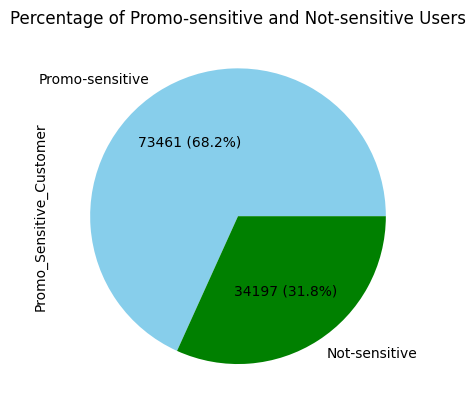

In [ ]:
user_count = df_clean['Promo_Sensitive_Customer'].value_counts()
user_percentage = df_clean['Promo_Sensitive_Customer'].value_counts(normalize=True) * 100
user_table = pd.DataFrame({'Count': user_count, 'Percentage': user_percentage})

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct,v=val)
    return my_format

user_count.plot(kind='pie', autopct=autopct_format(user_count), colors=['skyblue', 'green'] )
plt.title('Percentage of Promo-sensitive and Not-sensitive Users')
plt.show()

# Trends

In [ ]:
df_eda.groupby(['Promo_Sensitive_Customer']).agg({
    'account_id' : ['count'],
    'avg_txn_amt_l6m' : ['mean'],
    'txn_cnt_l6m' :['mean']

})

,account_id,avg_txn_amt_l6m,txn_cnt_l6m
,count,mean,mean
Promo_Sensitive_Customer,,,
Not-sensitive,34197,130.75,4.43
Promo-sensitive,73461,124.96,4.57


In [ ]:
df_eda.groupby(['Promo_Sensitive_Customer']).agg({
    'account_id' : ['count'],
    'avg_txn_amt_l6m' : ['mean'],
    'txn_cnt_l6m' :['mean']

})

,account_id,avg_txn_amt_l6m,txn_cnt_l6m
,count,mean,mean
Promo_Sensitive_Customer,,,
Not-sensitive,34197,130.75,4.43
Promo-sensitive,73461,124.96,4.57


In [ ]:
df_eda.groupby(['cust_value_group', 'Promo_Sensitive_Customer']).agg({
    'account_id': 'count',
    'avg_txn_amt_l6m': 'mean',
    'txn_cnt_l6m': 'mean'
})

account_id  avg_txn_amt_l6m  \
cust_value_group Promo_Sensitive_Customer                                
A                Not-sensitive                   5887           155.49   
                 Promo-sensitive                10502           138.88   
B                Not-sensitive                   5307           137.30   
                 Promo-sensitive                11690           128.00   
C                Not-sensitive                   5561           126.84   
                 Promo-sensitive                12173           125.09   
D                Not-sensitive                   3876           129.60   
                 Promo-sensitive                 8125           124.95   
E                Not-sensitive                  13566           119.39   
                 Promo-sensitive                30971           119.04   

                                           txn_cnt_l6m  
cust_value_group Promo_Sensitive_Customer               
A                Not-sensitive                    3.94  
                 Promo-sensitive                  4.39  
B                Not-sensitive                    4.27  
                 Promo-sensitive                  4.39  
C                Not-sensitive                    4.56  
                 Promo-sensitive                  4.52  
D                Not-sensitive                    4.51  
                 Promo-sensitive                  4.63  
E                Not-sensitive                    4.64  
                 Promo-sensitive                  4.69

In [ ]:
min_cnt = 0
max_cnt = 21

df_eda['cnt_promo_l6m_group'] = pd.cut(df_eda['cnt_promo_l12m'],
                                        bins=[min_cnt, 5, 10, 15, max_cnt],
                                        include_lowest=True)

df_eda['cnt_promo_l6m_group'].value_counts()

(10.0, 15.0]     73988
(5.0, 10.0]      13976
(15.0, 21.0]      6778
(-0.001, 5.0]      940
Name: cnt_promo_l6m_group, dtype: int64

In [ ]:
df_eda.groupby(['cnt_promo_l6m_group']).agg({
    'avg_txn_amt_l6m' : ['count'],
})

,avg_txn_amt_l6m
,count
cnt_promo_l6m_group,
"(-0.001, 5.0]",940
"(5.0, 10.0]",13976
"(10.0, 15.0]",73988
"(15.0, 21.0]",6778


# Save Pickle

In [ ]:
df_eda.to_pickle('df_eda.pickle')
df_clean.to_pickle('df_clean.pickle')
df1.to_pickle('df1.pickle')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentation ( Milestone 2 )

## Data Preparation

In [ ]:
df_clstr = df_eda.copy()
df_clstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   account_id                107658 non-null  int64         
 1   mcc                       107658 non-null  object        
 2   merchant_name             107658 non-null  object        
 3   avg_txn_amt_l6m           107658 non-null  float64       
 4   avg_txn_amt_ltm           107658 non-null  float64       
 5   avg_promo_txn_amt_l6m     107658 non-null  float64       
 6   avg_promo_txn_amt_ltm     107658 non-null  float64       
 7   txn_cnt_l6m               107658 non-null  float64       
 8   txn_cnt_ltm               107658 non-null  float64       
 9   promo_txn_cnt_l6m         107658 non-null  float64       
 10  promo_txn_cnt_ltm         107658 non-null  float64       
 11  last_txn_day              107658 non-null  float64       
 12  cn

### Adding new column total sales promo amount

In [ ]:
df_clstr['total_sales_promo_l6m'] = df_clstr['avg_txn_amt_l6m'] * df_clstr['txn_cnt_l6m']

### Adding new column total revenue 6 months

In [ ]:
df_clstr['total_revenue_l6m'] = df_clstr['total_sales_promo_l6m'] * 0.024

### Adding New Column Promo Sensitive Percentage

In [ ]:
df_clstr['promo_sensitive_percentage'] = (df_clstr['promo_txn_cnt_ltm'] / df_clstr['txn_cnt_ltm']) * 100
df_clstr['promo_sensitive_percentage'] = df_clstr['promo_sensitive_percentage'].round(2)
df_clstr['promo_sensitive_percentage']

0        33.33
1        45.45
2        33.33
3        48.15
4        47.73
          ... 
112628   41.67
112629   22.73
112630   42.86
112631   43.48
112632   64.00
Name: promo_sensitive_percentage, Length: 107658, dtype: float64

In [ ]:
df_clstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   account_id                  107658 non-null  int64         
 1   mcc                         107658 non-null  object        
 2   merchant_name               107658 non-null  object        
 3   avg_txn_amt_l6m             107658 non-null  float64       
 4   avg_txn_amt_ltm             107658 non-null  float64       
 5   avg_promo_txn_amt_l6m       107658 non-null  float64       
 6   avg_promo_txn_amt_ltm       107658 non-null  float64       
 7   txn_cnt_l6m                 107658 non-null  float64       
 8   txn_cnt_ltm                 107658 non-null  float64       
 9   promo_txn_cnt_l6m           107658 non-null  float64       
 10  promo_txn_cnt_ltm           107658 non-null  float64       
 11  last_txn_day                107658 non-

In [ ]:
df_clstr.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,customer_age,age_group,gender_describe,month_account_created,creation_year,proxy_income_groups,cnt_promo_l6m_group,total_sales_promo_l6m,total_revenue_l6m,promo_sensitive_percentage
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5.00,21.00,2.00,...,48.00,41-50,Female,2012-10,2012,50001 - 100000,"(15.0, 21.0]",1080.00,25.92,33.33
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3.00,22.00,2.00,...,32.00,30-40,Female,2013-12,2013,2000 - 50000,"(10.0, 15.0]",429.90,10.32,45.45
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4.00,12.00,2.00,...,53.00,>50,Male,2015-08,2015,NaN,NaN,1053.20,25.28,33.33
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8.00,27.00,6.00,...,40.00,30-40,Female,2015-11,2015,NaN,"(15.0, 21.0]",1884.80,45.24,48.15
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5.00,44.00,4.00,...,34.00,30-40,Female,2012-09,2012,2000 - 50000,"(15.0, 21.0]",490.00,11.76,47.73


### Creating new dataset for clustering

In [ ]:
df_clstr2 = df_clstr[['account_id','avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']]
df_clstr2.head()

,account_id,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m
0,100000004,216.00,5.00,33.33,25.92
1,100000008,143.30,3.00,45.45,10.32
2,100000012,263.30,4.00,33.33,25.28
3,100000014,235.60,8.00,48.15,45.24
4,100000015,98.00,5.00,47.73,11.76


### Preparing Data ( Box-Ploting )
* Average sales amount in last 6 months
* Amount of Transactions in last 6 months
* Promo sensitive percentagge
* Total revenue in last 6 months

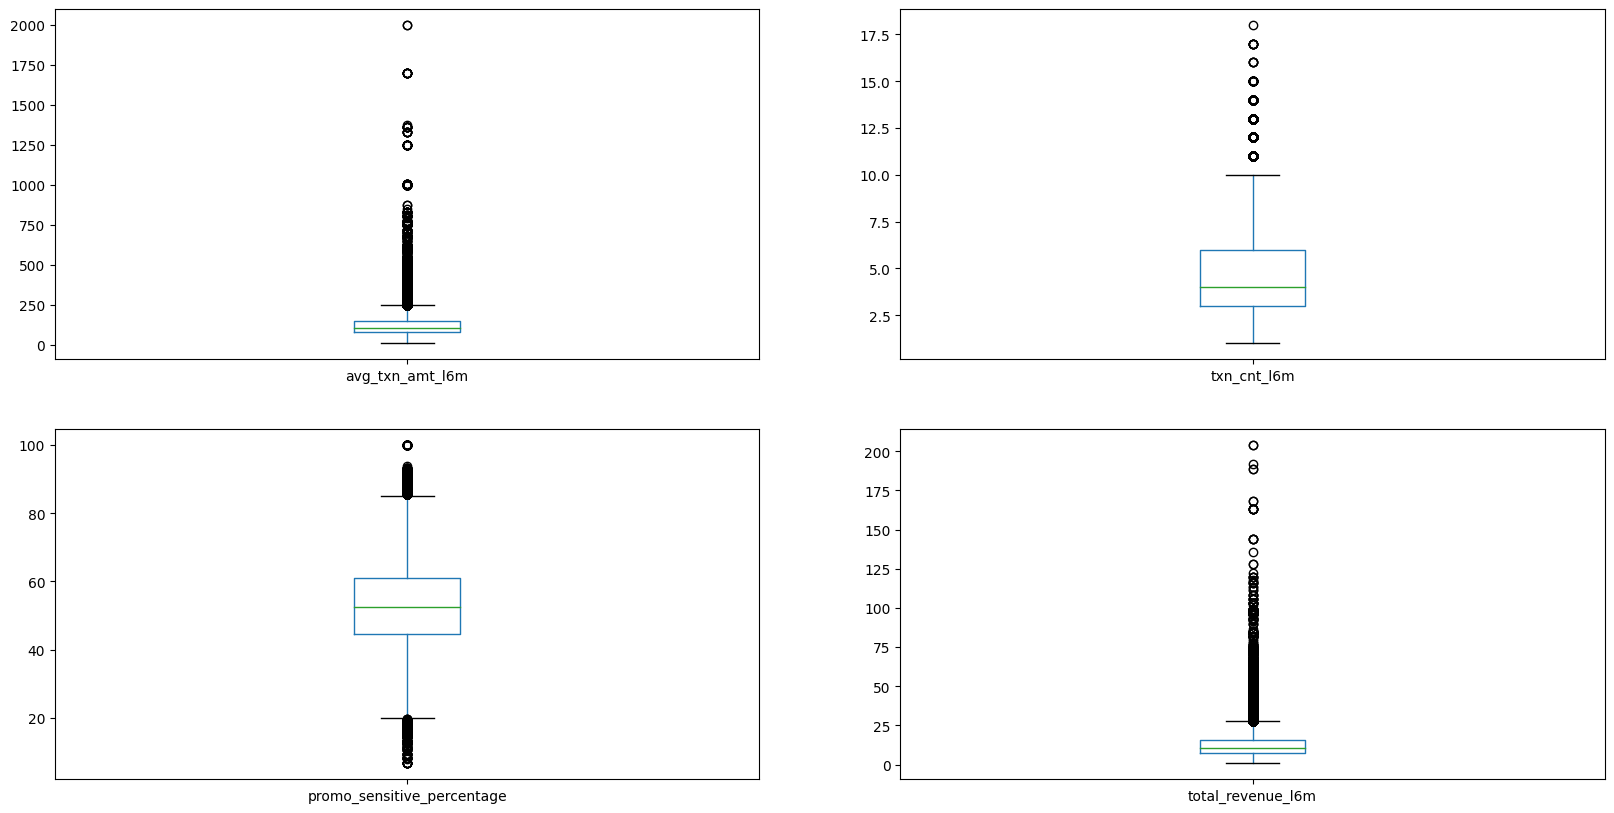

In [ ]:
# filter numeric column
feature = ['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_clstr2.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

## Check Data Distribution

### No Scale

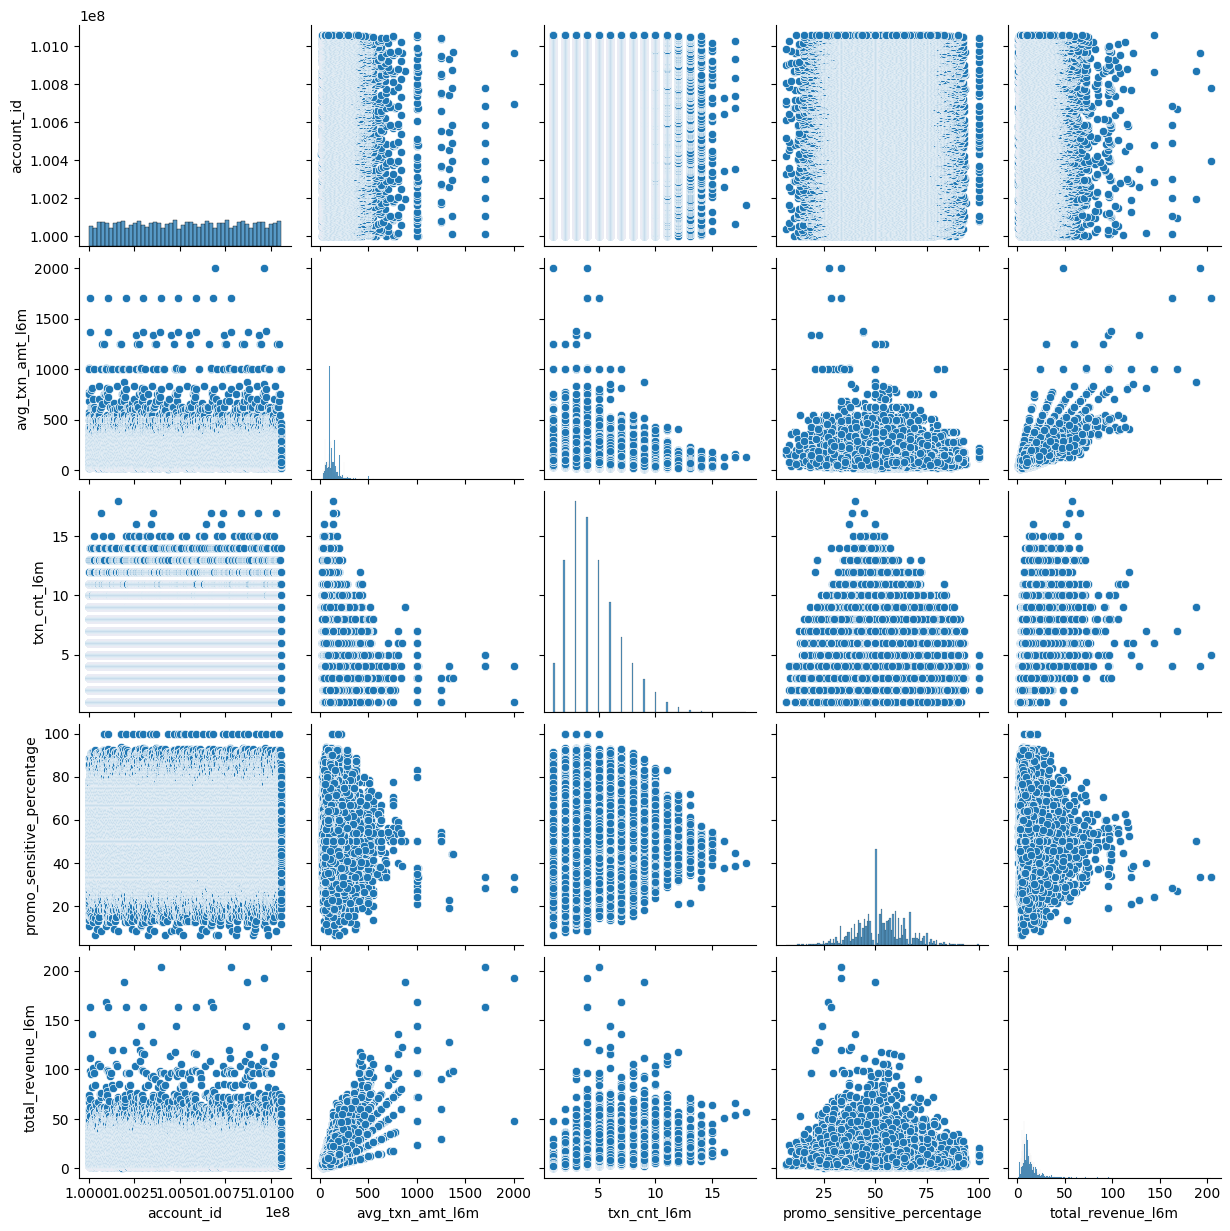

In [ ]:
sns.pairplot(df_clstr2)

### Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_clstr2.copy()
column = ['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

In [ ]:
ss_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']].head()

,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m
0,1.12,0.21,-1.55,1.46
1,0.21,-0.66,-0.58,-0.25
2,1.71,-0.23,-1.55,1.39
3,1.36,1.50,-0.36,3.59
4,-0.36,0.21,-0.40,-0.10


### Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_clstr2.copy()
column = ['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']] = rs_scaler.fit_transform(rs_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']])

In [ ]:
rs_scale_df.head()

,account_id,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m
0,100000004,1.62,0.33,-1.17,1.90
1,100000008,0.53,-0.33,-0.44,-0.00
2,100000012,2.33,0.00,-1.17,1.83
3,100000014,1.91,1.33,-0.27,4.26
4,100000015,-0.15,0.33,-0.30,0.18


### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_clstr2.copy()
column = ['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']] = mm_scaler.fit_transform(mm_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']])

In [ ]:
mm_scale_df.head()


,account_id,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m
0,100000004,0.10,0.24,0.29,0.12
1,100000008,0.07,0.12,0.42,0.05
2,100000012,0.13,0.18,0.29,0.12
3,100000014,0.11,0.41,0.44,0.22
4,100000015,0.04,0.24,0.44,0.05


## Cluster

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

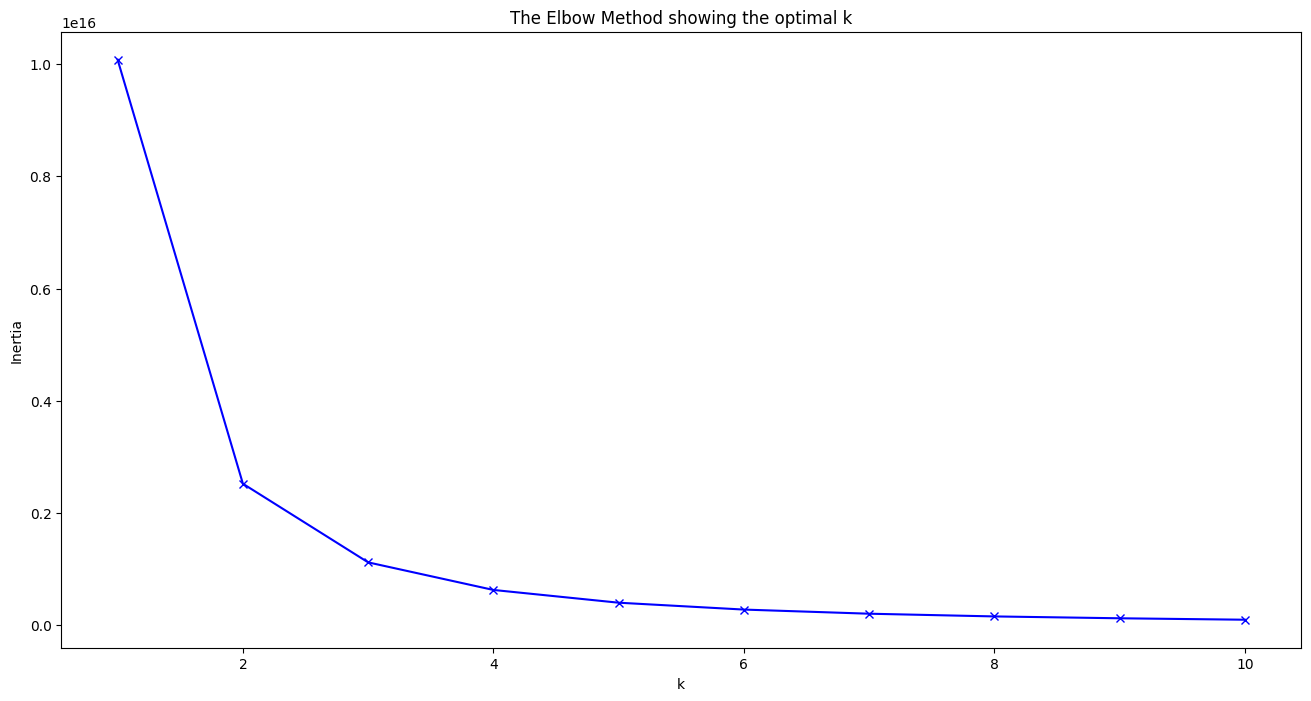

[1.0076738974330676e+16, 2522178399850044.0, 1120676959220933.5, 629324005178699.8, 402090138206471.5, 279719752880748.25, 205958736137236.5, 157632216856971.6, 124526785566942.22, 98848138900098.08]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.35586263409243124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.27673973924141426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.26520251197179195


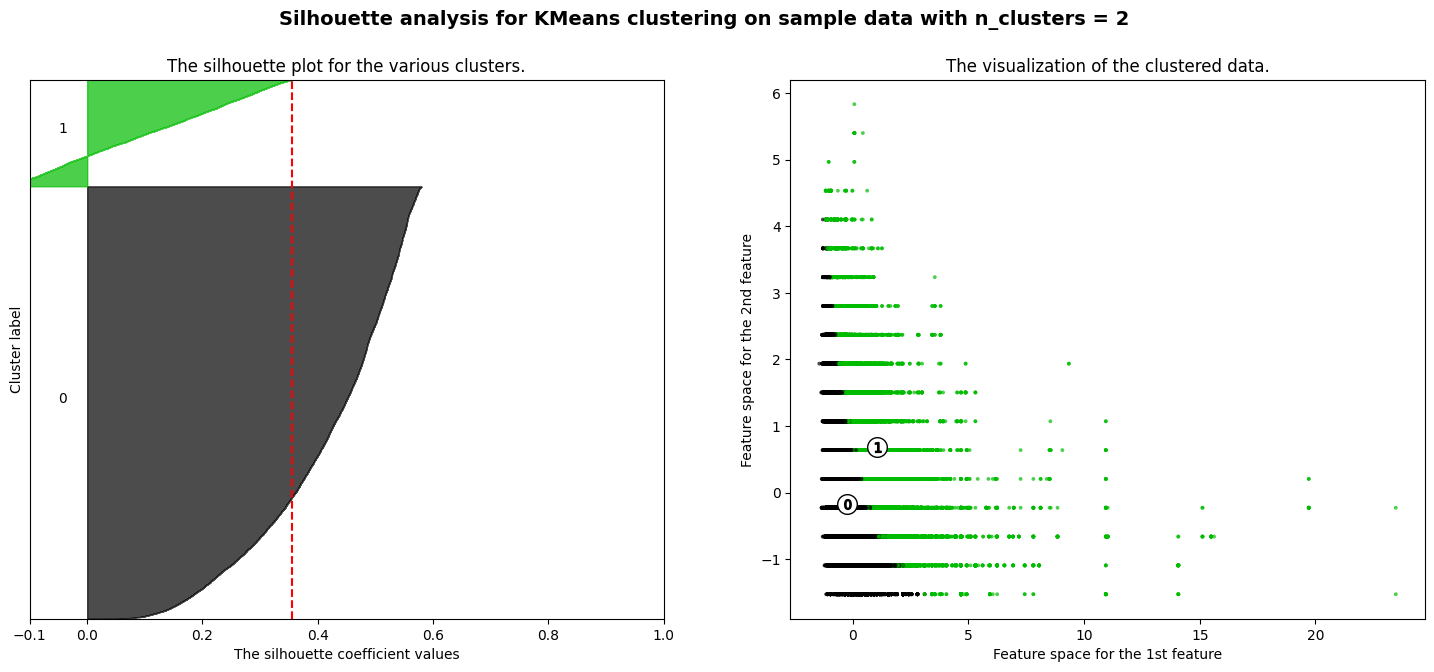

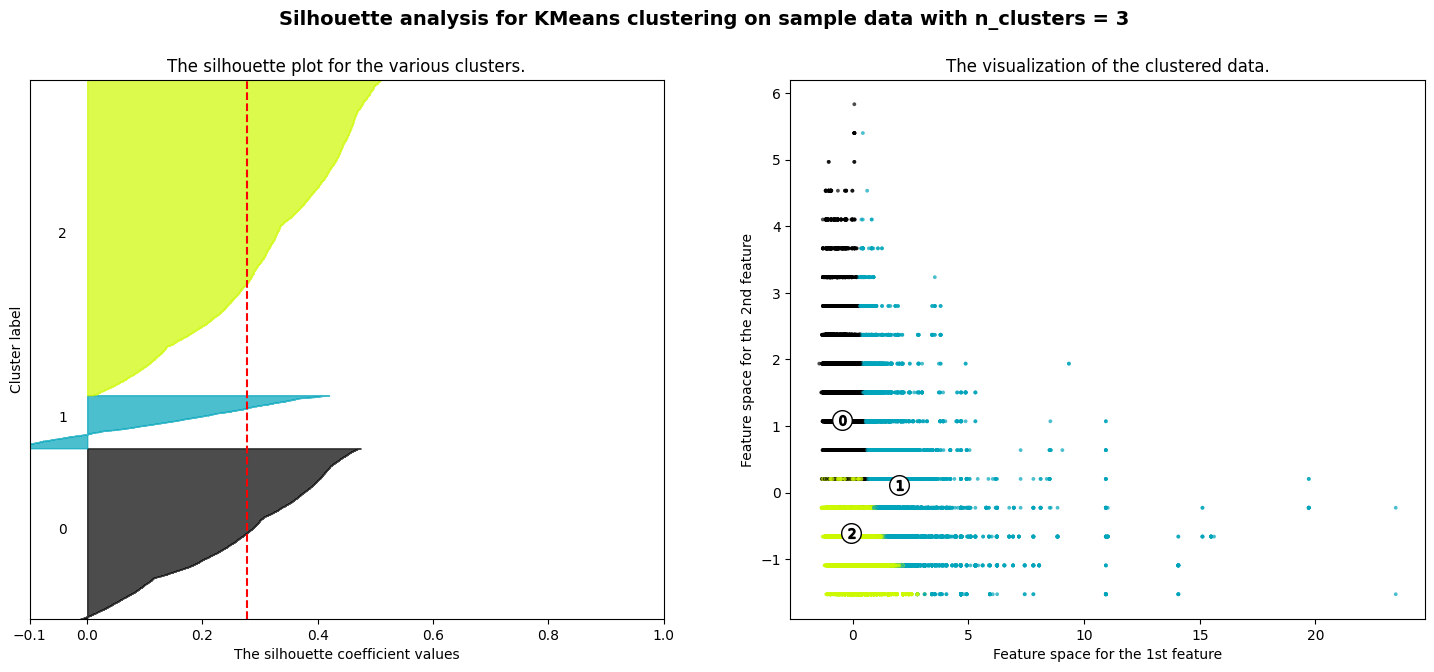

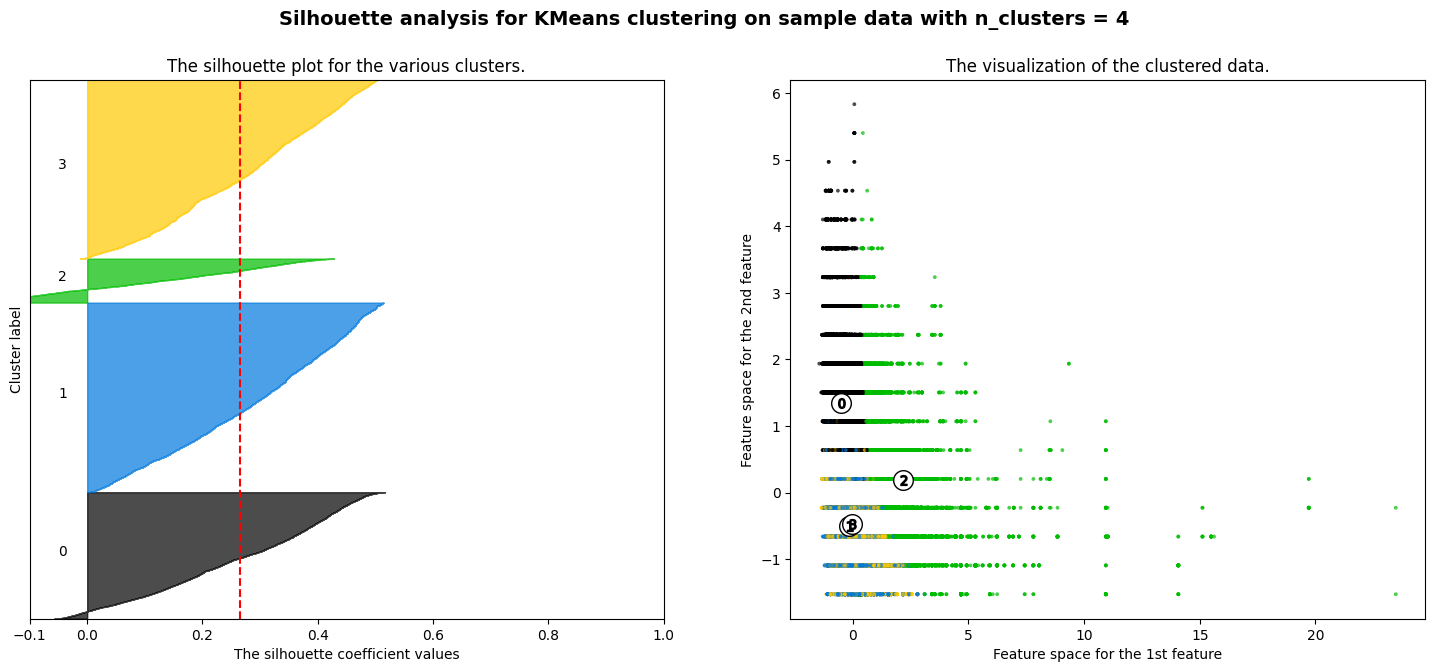

In [ ]:
silhoutte_analysis(ss_scale_df[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']],list(range(2,5)))                   #------Tinggal ganti di variablenya dan rangenya

## Segmentation

### Cluester 3

In [ ]:
# make cluster
cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(cluster_3[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']])
cluster_3['cluster'] = cluster_model.labels_
cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,account_id,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m,cluster
0,100000004,1.12,0.21,-1.55,1.46,2
1,100000008,0.21,-0.66,-0.58,-0.25,1
2,100000012,1.71,-0.23,-1.55,1.39,2
3,100000014,1.36,1.50,-0.36,3.59,2
4,100000015,-0.36,0.21,-0.40,-0.10,0


<Axes: xlabel='cluster', ylabel='avg_txn_amt_l6m'>

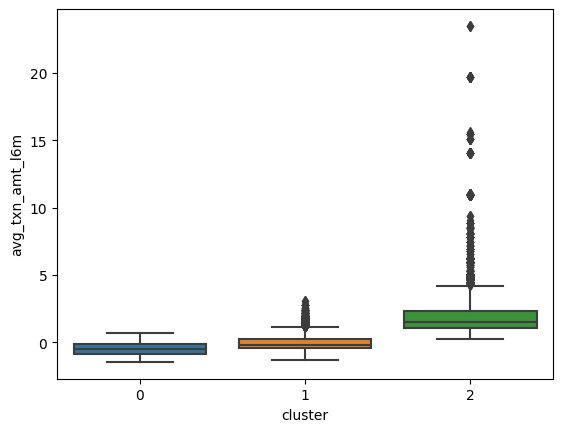

In [ ]:
sns.boxplot(data=cluster_3, x='cluster', y='avg_txn_amt_l6m')

<Axes: xlabel='cluster', ylabel='txn_cnt_l6m'>

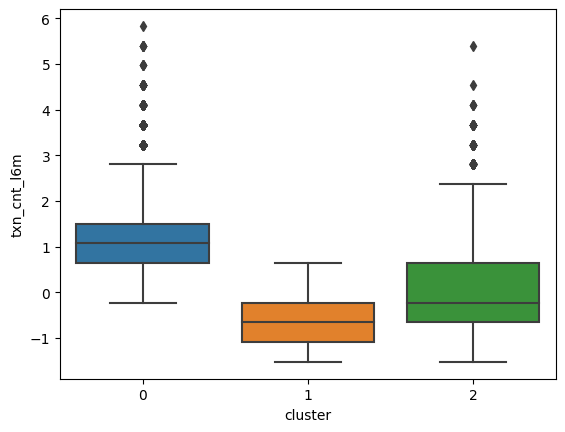

In [ ]:
sns.boxplot(data=cluster_3, x='cluster', y='txn_cnt_l6m')

<Axes: xlabel='cluster', ylabel='promo_sensitive_percentage'>

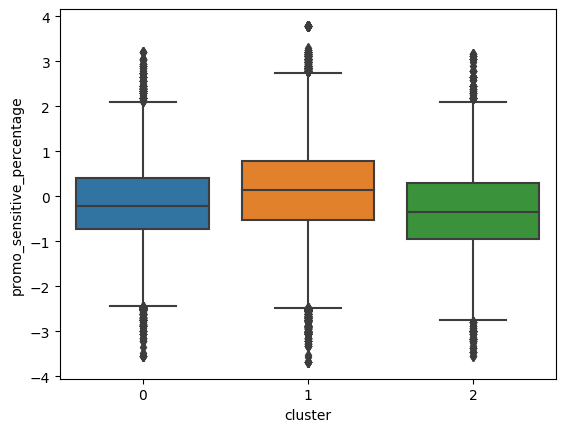

In [ ]:
sns.boxplot(data=cluster_3, x='cluster', y='promo_sensitive_percentage')

<Axes: xlabel='cluster', ylabel='total_revenue_l6m'>

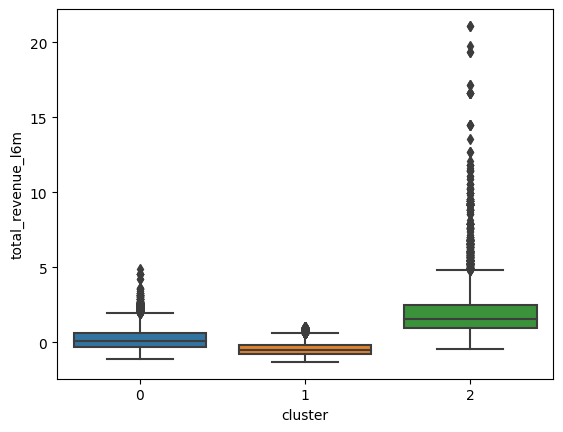

In [ ]:
sns.boxplot(data=cluster_3, x='cluster', y='total_revenue_l6m')

### Cluester 4

In [ ]:
# make cluster
cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(cluster_4[['avg_txn_amt_l6m', 'txn_cnt_l6m','promo_sensitive_percentage','total_revenue_l6m']])
cluster_4['cluster'] = cluster_model.labels_
cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,account_id,avg_txn_amt_l6m,txn_cnt_l6m,promo_sensitive_percentage,total_revenue_l6m,cluster
0,100000004,1.12,0.21,-1.55,1.46,3
1,100000008,0.21,-0.66,-0.58,-0.25,0
2,100000012,1.71,-0.23,-1.55,1.39,3
3,100000014,1.36,1.50,-0.36,3.59,3
4,100000015,-0.36,0.21,-0.40,-0.10,0


<Axes: xlabel='cluster', ylabel='avg_txn_amt_l6m'>

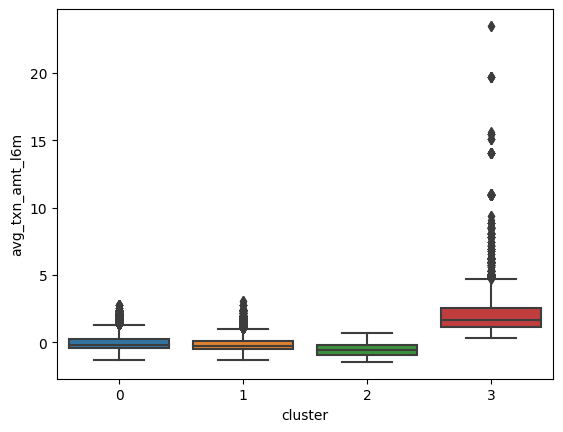

In [ ]:
sns.boxplot(data=cluster_4, x='cluster', y='avg_txn_amt_l6m')

<Axes: xlabel='cluster', ylabel='txn_cnt_l6m'>

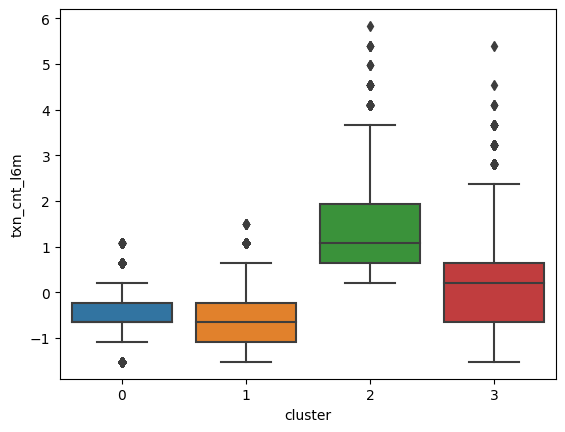

In [ ]:
sns.boxplot(data=cluster_4, x='cluster', y='txn_cnt_l6m')

<Axes: xlabel='cluster', ylabel='promo_sensitive_percentage'>

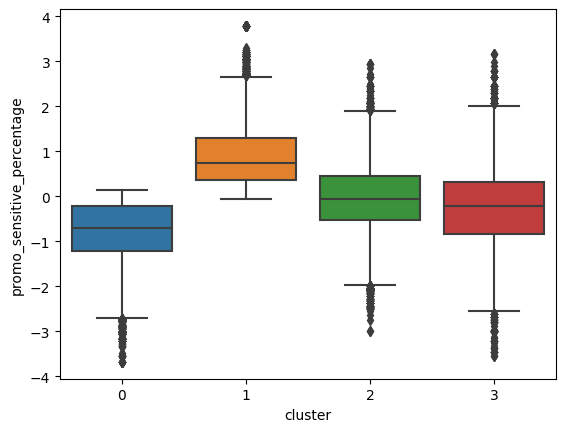

In [ ]:
sns.boxplot(data=cluster_4, x='cluster', y='promo_sensitive_percentage')

<Axes: xlabel='cluster', ylabel='total_revenue_l6m'>

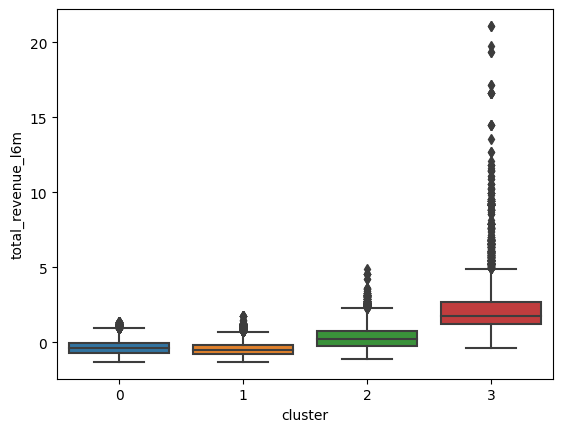

In [ ]:
sns.boxplot(data=cluster_4, x='cluster', y='total_revenue_l6m')

# Join table cluster and dateset

In [ ]:
df_segmented = cluster_4.merge(df_clstr,how= 'inner', on = 'account_id')
df_segmented.head()

,account_id,avg_txn_amt_l6m_x,txn_cnt_l6m_x,promo_sensitive_percentage_x,total_revenue_l6m_x,cluster,mcc,merchant_name,avg_txn_amt_l6m_y,avg_txn_amt_ltm,...,customer_age,age_group,gender_describe,month_account_created,creation_year,proxy_income_groups,cnt_promo_l6m_group,total_sales_promo_l6m,total_revenue_l6m_y,promo_sensitive_percentage_y
0,100000004,1.12,0.21,-1.55,1.46,3,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,...,48.00,41-50,Female,2012-10,2012,50001 - 100000,"(15.0, 21.0]",1080.00,25.92,33.33
1,100000008,0.21,-0.66,-0.58,-0.25,0,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,...,32.00,30-40,Female,2013-12,2013,2000 - 50000,"(10.0, 15.0]",429.90,10.32,45.45
2,100000012,1.71,-0.23,-1.55,1.39,3,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,...,53.00,>50,Male,2015-08,2015,NaN,NaN,1053.20,25.28,33.33
3,100000014,1.36,1.50,-0.36,3.59,3,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,...,40.00,30-40,Female,2015-11,2015,NaN,"(15.0, 21.0]",1884.80,45.24,48.15
4,100000015,-0.36,0.21,-0.40,-0.10,0,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,...,34.00,30-40,Female,2012-09,2012,2000 - 50000,"(15.0, 21.0]",490.00,11.76,47.73


In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   account_id                    107658 non-null  int64         
 1   avg_txn_amt_l6m_x             107658 non-null  float64       
 2   txn_cnt_l6m_x                 107658 non-null  float64       
 3   promo_sensitive_percentage_x  107658 non-null  float64       
 4   total_revenue_l6m_x           107658 non-null  float64       
 5   cluster                       107658 non-null  int32         
 6   mcc                           107658 non-null  object        
 7   merchant_name                 107658 non-null  object        
 8   avg_txn_amt_l6m_y             107658 non-null  float64       
 9   avg_txn_amt_ltm               107658 non-null  float64       
 10  avg_promo_txn_amt_l6m         107658 non-null  float64       
 11  avg_promo_txn

# Identify segment

## Higher average sales per client

In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   account_id                    107658 non-null  int64         
 1   avg_txn_amt_l6m_x             107658 non-null  float64       
 2   txn_cnt_l6m_x                 107658 non-null  float64       
 3   promo_sensitive_percentage_x  107658 non-null  float64       
 4   total_revenue_l6m_x           107658 non-null  float64       
 5   cluster                       107658 non-null  int32         
 6   mcc                           107658 non-null  object        
 7   merchant_name                 107658 non-null  object        
 8   avg_txn_amt_l6m_y             107658 non-null  float64       
 9   avg_txn_amt_ltm               107658 non-null  float64       
 10  avg_promo_txn_amt_l6m         107658 non-null  float64       
 11  avg_promo_txn

In [ ]:
df_segmented.groupby(['cluster']).agg({
    'avg_txn_amt_l6m_y' : ['sum'],
})

,avg_txn_amt_l6m_y
,sum
cluster,
0,4491408.60
1,4331975.60
2,2199837.00
3,2627488.50


## Higher average transaction frequency

In [ ]:
df_segmented.groupby(['cluster']).agg({
    'account_id' : ['count'],
})

,account_id
,count
cluster,
0,36072
1,37527
2,25275
3,8784


### Cluster 1

In [ ]:
avg_cluster_1 = df_segmented[df_segmented['cluster'] == 0][['cluster', 'txn_cnt_l6m_y']].copy()


In [ ]:
avg_cluster_1.head()

,cluster,txn_cnt_l6m_y
1,0,3.00
4,0,5.00
9,0,3.00
10,0,3.00
12,0,5.00


In [ ]:
avg_cluster_1['txn_cnt_l6m_y'].count()

36072

In [ ]:
mean1 = avg_cluster_1['txn_cnt_l6m_y'].mean()
print(f'Average transaction frequency in cluster 1 is {mean1}')

Average transaction frequency in cluster 1 is 3.440175205145265


### Cluster 2

In [ ]:
avg_cluster_2 = df_segmented[df_segmented['cluster'] == 1][['cluster', 'txn_cnt_l6m_y']].copy()
avg_cluster_2.head()

,cluster,txn_cnt_l6m_y
20,1,3.00
26,1,4.00
27,1,5.00
32,1,3.00
35,1,3.00


In [ ]:
avg_cluster_2['txn_cnt_l6m_y'].count()

37527

In [ ]:
mean2 = avg_cluster_2['txn_cnt_l6m_y'].mean()
print(f'Average transaction frequency in cluster 2 is {mean2}')

Average transaction frequency in cluster 2 is 3.369920324033363


### Cluster 3

In [ ]:
avg_cluster_3 = df_segmented[df_segmented['cluster'] == 2][['cluster', 'txn_cnt_l6m_y']].copy()
avg_cluster_3.head()

,cluster,txn_cnt_l6m_y
5,2,7.00
8,2,7.00
11,2,8.00
15,2,6.00
16,2,6.00


In [ ]:
avg_cluster_3['txn_cnt_l6m_y'].count()

25275

In [ ]:
mean3 = avg_cluster_3['txn_cnt_l6m_y'].mean()
print(f'Average transaction frequency in cluster 3 is {mean3}')

Average transaction frequency in cluster 3 is 7.6348961424332344


### Cluster 4

In [ ]:
avg_cluster_4 = df_segmented[df_segmented['cluster'] == 3][['cluster', 'txn_cnt_l6m_y']].copy()
avg_cluster_4.head()

,cluster,txn_cnt_l6m_y
0,3,5.00
2,3,4.00
3,3,8.00
6,3,13.00
7,3,6.00


In [ ]:
avg_cluster_4['txn_cnt_l6m_y'].count()

8784

In [ ]:
mean4 = avg_cluster_4['txn_cnt_l6m_y'].mean()
print(f'Average transaction frequency in cluster 4 is {mean4}')

Average transaction frequency in cluster 4 is 4.959927140255009


#### Insight

* Average transaction frequency in cluster 1 is  3.4402812908246934
* Average transaction frequency in cluster 2 is 3.3714672758181043 7.636997149192271
* Average transaction frequency in cluster 3 is 7.636997149192271 4.958072234248604
* Average transaction frequency in cluster 4 is 4.958072234248604

From the data, we can see thatt **CLUSTER 3 (2)** have the highest average transaction frequency

In [ ]:
df_segmented.groupby(['cluster']).agg({
    'txn_cnt_l6m_y' : ['mean'],
})

,txn_cnt_l6m_y
,mean
cluster,
0,3.44
1,3.37
2,7.63
3,4.96


## Higher revenue generated

In [ ]:
df_segmented.groupby(['cluster']).agg({
    'total_revenue_l6m_y' : ['sum'],
})

,total_revenue_l6m_y
,sum
cluster,
0,350995.32
1,330588.88
2,392468.96
3,285288.09


### Insight

From the data, we cann see that **CLUSTER 2 (Cluster 1 in table)** having the highest revenue generated

### Larger proportion of promo-sensitive clients

In [ ]:
df_segmented.groupby(['cluster','Promo_Sensitive_Customer']).agg({
    'account_id' : ['count'],
})

account_id
                                      count
cluster Promo_Sensitive_Customer           
0       Not-sensitive                 18974
        Promo-sensitive               17098
1       Not-sensitive                  4958
        Promo-sensitive               32569
2       Not-sensitive                  7353
        Promo-sensitive               17922
3       Not-sensitive                  2912
        Promo-sensitive                5872

# Save Pickle

In [ ]:
df_segmented.to_pickle('df_segmented.pickle')

In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   account_id                    107658 non-null  int64         
 1   avg_txn_amt_l6m_x             107658 non-null  float64       
 2   txn_cnt_l6m_x                 107658 non-null  float64       
 3   promo_sensitive_percentage_x  107658 non-null  float64       
 4   total_revenue_l6m_x           107658 non-null  float64       
 5   cluster                       107658 non-null  int32         
 6   mcc                           107658 non-null  object        
 7   merchant_name                 107658 non-null  object        
 8   avg_txn_amt_l6m_y             107658 non-null  float64       
 9   avg_txn_amt_ltm               107658 non-null  float64       
 10  avg_promo_txn_amt_l6m         107658 non-null  float64       
 11  avg_promo_txn

# Segmentation Cluster. Insight

In [ ]:
df_segmented.groupby(['cluster']).agg({
    'avg_txn_amt_l6m_y' : ['mean'],
    'avg_promo_txn_amt_l6m' : ['mean'],
    'txn_cnt_l6m_y' : ['mean'],
    'promo_txn_cnt_l6m' : ['mean'],
    'cnt_promo_l6m' : ['mean'],
    'total_revenue_l6m_y' : ['mean'],
})

,avg_txn_amt_l6m_y,avg_promo_txn_amt_l6m,txn_cnt_l6m_y,promo_txn_cnt_l6m,cnt_promo_l6m,total_revenue_l6m_y
,mean,mean,mean,mean,mean,mean
cluster,,,,,,
0,124.51,123.44,3.44,1.86,5.69,9.73
1,115.44,114.83,3.37,2.34,5.40,8.81
2,87.04,86.44,7.63,4.84,6.10,15.53
3,299.12,294.35,4.96,3.05,6.36,32.48
